<a href="https://colab.research.google.com/github/chanyoung98/-/blob/main/3%EC%9E%A5_%EA%B3%A0%EA%B0%9D%EC%9D%98_%EC%A0%84%EC%B2%B4_%EB%AA%A8%EC%8A%B5%EC%9D%84_%ED%8C%8C%EC%95%85%ED%95%98%EB%8A%94_%ED%85%8C%ED%81%AC%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 데이터를 받아들이자

In [4]:
import pandas as pd
campaign_master = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬실무테크닉/3장-고객의 전체 모습을 파악하는 테크닉/campaign_master.csv")
uselog = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬실무테크닉/3장-고객의 전체 모습을 파악하는 테크닉/use_log.csv")
customer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬실무테크닉/3장-고객의 전체 모습을 파악하는 테크닉/customer_master.csv")
class_master = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이썬실무테크닉/3장-고객의 전체 모습을 파악하는 테크닉/class_master.csv")

In [5]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [6]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [7]:
class_master.head()

,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [8]:
campaign_master.head()

,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


# 고객 데이터를 가공하자

고객 데이터를 가공하자. customer에 회원 구분 class_master과 캠페인 구분 campaign_master를 결합하여 customer_join을 새로 생서한다. 

In [9]:
customer_join = pd.merge(customer, class_master, on = 'class', how = 'left')
customer_join = pd.merge(customer_join, campaign_master, on = 'campaign_id', how = 'left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [10]:
len(customer) == len(customer_join)

True

조인할 때 키가 없거나 조인이 잘못되면 자동으로 결측치가 들어간다. 그래서 조인 후에는 결측치를 확인해야 한다.

In [11]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

나름 깔끔하게 조인되었음을 확인할 수 있다.

# 고객 데이터를 집계하자
데이터 가공을 완료했으니 고객 데이터를 집계해서 전체 모습을 살펴보겠다.  

먼저, 집계 항목을 생각해보자. 어떤 회원과 어떤 캠페인이 많은지, 언제 입회/탈퇴가 많은지, 남녀 비율은 얼마인지, 탈퇴할 때까지의 기간은 어느 정도인지 등 많은 것을 집계할 수 있다.

우선 캠페인 구분과 성별, 이미 탈퇴를 했는지 안 했는지(is_deleted 열)를 집계해서 전체 숫자를 파악하자.


In [12]:
customer_join.groupby("class_name").count()['customer_id']
#종일반이 절반을 차지

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [13]:
customer_join.groupby("campaign_name").count()['customer_id']
#일반입회가 가장많음
#입회 캠페인에 의한 가입 : 전체 20퍼

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [14]:
customer_join.groupby("gender").count()['customer_id']
#남 > 여

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [15]:
customer_join.groupby("is_deleted").count()['customer_id']
#2019년 3월 기준 가입 : 2842, 탈퇴 : 1350

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

start_date가 2018년 4월 1일 이후부터 2019년 3월 31일까지인 가입 인원을 시험 삼아 집계해보자.

In [16]:
#start_date를 datetime형으로 변환 후, customer_start 변수에 해당 유저의 데이터를 저장하고 개수를 세어보자.
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


2018년 4월 1일 이후부터의 가입인원이 1361명인 것을 알 수 있다.  

이제 최근 고객 정보를 살펴보자.

# 최신 고객 데이터를 집계하자.
가장 최근 월(2019년 3월)의 고객 데이터를 파악해보자. 현재 고객 데이터에는 이미 탈퇴한 고객도 포함되어 있기에 월별 집계와는 차이가 있다. 여기서는 가장 최근 월의 고객 데이터를 집계하여 현재 고객의 전체 모습을 확인할 수 있다.  

먼저, 가장 최근 월의 고객만 추출해보자.  
최근 월로 추출하기 위한 방법은 두 가지가 있다.
1. 2019년 3월에 탈퇴한 고객과 재적중인 고객 추출
2. is_deleted 열로 추출  

2의 경우는 2019년 3월에 탈퇴한 고객은 카운트되지 않기 때문에 주의해야한다. 목적에 따라 달라지지만, 이번에는 최근 월에 재적 중인 회원이므로 1의 방법을 이용해보자.

In [17]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


In [18]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])

In [19]:
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]

In [20]:
customer_newer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


출력한 결과, 데이터는 2953건이고, end_date의 유니크는 NaT로, 2019-03-31만 표시된다면 올바르게 추출된 것이다. NaT는 datatime형의 결측치라는 의미로, 여기서는 탈퇴하지 않는 고객을 나타낸다.  

그럼 회원 구분, 캠페인 구분, 성별로 전체를 파악해보자.

In [21]:
customer_newer.groupby("class_name").count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [22]:
customer_newer.groupby("campaign_name").count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [23]:
customer_newer.groupby("gender").count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

회원이나 성별 구분은 큰 변화가 없는 데 반해, 캠페인 구분은 약간의 차이가 있다.  

이용 이력 데이터의 활용을 검토해보자.

이용 이력 데이터로 무엇을 알 수 있을까? 고객 데이터와는 달리, 시간적인 요소를 분석할 수 있다. 예를 들어, 한 달 이용 횟수의 변화나 회원이 스포츠 센터를 정기적으로 이용하는지, 비정기적으로 이용하는지와 같은 것을 알 수 있다.

# 이용 이력 데이터를 집계하자.
먼저, 간단히 시간적인 요소를 도입해보자. 이번에는 월 이용 횟수의 평균값, 중앙값, 최댓값, 최솟값과 정기적 이용 여부를 플래그로 작성해서 고객 데이터에 추가한다. 먼저, 고객마다 월 이용 횟수를 집계한 데이터를 작성해보자.

In [24]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m') #연월 칼럼 만들기
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index = False).count() #as_index = False -> 기준이 되는 칼럼이 그대로 변수가 된다.
#uselog_months : 각 연월 별 회원의 이용 수
uselog_months.rename(columns = {'log_id' : 'count'}, inplace = True)
del uselog_months['usedate']
uselog_months.head()
print(uselog_months.shape)
uselog_months.head()
#고객 AS002855는 2018년 4월에 4번 이용했음을 알 수 있다.

(36842, 3)


,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


이제 고객별로 평균값, 중앙값, 최댓값, 최솟값을 집계해보자.


In [25]:
uselog_customer = uselog_months.groupby("customer_id").agg(['mean','median','max','min'])['count'] #agg : 집계,,, 고객 별로 이용수 통계량 집계
uselog_customer = uselog_customer.reset_index(drop = False) #인덱스 제거, drop = False함으로써 인덱스 변수 살리기
print(uselog_customer.shape)
uselog_customer.head()

(4192, 5)


,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


고객별 월 이용 횟수 집계가 끝났다. 다음은 정기적/비정기적 스포츠 센터 이용 여부를 플래그로 작성해보자.

# 이용 이력 데이터로부터 정기 이용 플래그를 작성하자.
스포츠 센터의 경우 지속 요소 중 하나로 "습관"을 생각할 수 있다. 여기서는 정기적으로 센터를 이용하는 고객을 특정해보자. 정기적이라는 것은 정의하는 방법에 따라 다르지만, 여기서는 매주 같은 요일에 왔는지 아닌지로 판단하겠다.  
월별 정기적 이용 여부는 고객에 따라 다르겠지만, 여기서는 고객마다 월/요일별로 집계하고, 최댓값이 4 이상인 요일이 하나라도 있는 회원은 플래그를 1로 처리한다.

먼저, 고객마다 월/요일별로 집계하자.

In [26]:
uselog['weekday'] = uselog['usedate'].dt.weekday #요일을 숫자로 변환함. 월요일 : 0, 일요일 : 6
uselog_weekday = uselog.groupby(['customer_id','연월','weekday'], as_index = False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.rename(columns = {'log_id' : 'count'}, inplace = True)
uselog_weekday.head()

#회원 AS002855는 토요일(5)에 자주 체육관을 오는 것으로 확인할 수 있다.
#고객별로 최댓값을 계산하고, 그 최댓값이 4 이상인 경우에 플래그를 지정해보자.

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [27]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index = False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
#where(Series객체에 대한 조건문, 거짓 값에 대한 대체 값)
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1) #횟수가 4 만인 경우는 원래의 값인 0을 그대로 두고 4 이상인 경우에만 1을 대입한다.
uselog_weekday.head()

<ipython-input-27-62fd08f2b3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uselog_weekday['routine_flg'] = 0
<ipython-input-27-62fd08f2b3da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1) #횟수가 4 만인 경우는 원래의 값인 0을 그대로 두고 4 이상인 경우에만 1을 대입한다.


,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


count가 4 이상인 고객의 경우 플래그에 1이 들어 있음을 알 수 있다.   

이렇게 플래그 작성이 완료되었다. 다음으로, 고객 데이터와 결합해서 최대 이력을 포함한 고객 데이터를 수정하자.

# 고객 데이터와 이용 이력 데이터를 결합하자.

여기서는 uselog_customer과 uselog_weekday를 customer_join과 결합하자.

In [28]:
customer_join = pd.merge(customer_join, uselog_customer, on = 'customer_id', how = 'left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id', 'routine_flg']], on = 'customer_id', how = 'left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


만일을 위해 결측치도 확인해두자.

In [29]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

end_date 이외에는 결측치가 없는 것을 보아, 결합이 문제없다는 것을 확인하였다.  

드디어, 이용 이력도 추가되어 고객 분석이 가능해졌다. 이용 이력인 시간적인 변화 데이터를 추가했기에, 분석을 시작하기 전에 회원 기간 칼럼을 하나 더 추가해두자.

# 회원 기간을 계산하자
회원 기간을 계산하여 칼럼으로 추가해보자.

회원 기간은 단순하게 start_date와 end_date의 차이이다. 다만, 2019년 3월까지 탈퇴하지 않은 회원은 end_date에 결측치로 들어 있기에 그 차이를 계산할 수 없다. 따라서 탈퇴하지 않은 회원은 2019년 4월 30일로 채워서 회원 기간을 계산한다. 2019년 3월 31일로 계산할 경우, 실제로 2019년 3월 31일에 탈퇴한 사람과 구별할 수 없기 때문이다.  

그럼 기간을 계산해보자. 여기서는 월 단위로 집계한다.

In [31]:
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0


In [57]:
#월 단위로 집계하여 기간을 계산해보자.
from dateutil.relativedelta import relativedelta

customer_join["calc_date"] = customer_join['end_date']
customer_join["calc_date"] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
  customer_join['membership_period'].iloc[i] = delta.years * 12 + delta.months #시작 - 끝의 관계(relativedelta)를 월 단위로 변환
customer_join.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [44]:
customer_join["calc_date"] = customer_join['end_date']
customer_join["calc_date"] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))

delta = relativedelta(customer_join['calc_date'].iloc[0], customer_join['start_date'].iloc[0]) #relativedelta(years=+3, months=+11, days=+29)

In [58]:
delta

relativedelta(months=+1, days=+15)

In [59]:
customer_join[['start_date', 'calc_date']]

,start_date,calc_date
0,2015-05-01,2019-04-30
1,2015-05-01,2019-04-30
2,2015-05-01,2019-04-30
3,2015-05-01,2019-04-30
4,2015-05-01,2019-04-30
...,...,...
4187,2019-03-14,2019-04-30
4188,2019-03-14,2019-04-30
4189,2019-03-14,2019-04-30
4190,2019-03-14,2019-04-30


# 고객 행동의 각종 통계량을 파악하자
전체 숫자를 살펴보자.  

describe를 이용하여 통계량을 살펴보자.

In [60]:
customer_join[['mean', 'median', 'max', 'min']].describe() #컬럼 : 고객별 매월 이용 횟수의 평균, 중앙값, 최대값, 최소값

#한 사람 당 매월 평균 이용 횟수 : 5.333127 ,,, 고객 1명당 이용 횟수는 약 5번 정도인 것을 알 수 있다.

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [61]:
customer_join.groupby("routine_flg").count()['customer_id']
#1이 주 4회 이상 다니는 사람 -> 정기적으로 이용하는 회원의 수가 많다는 것을 알 수 있다.

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

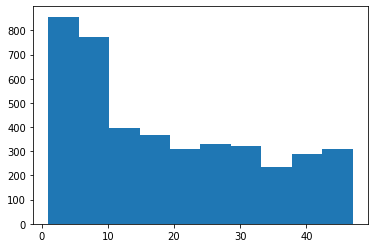

In [62]:
#회원기간의 분포를 살펴보자. 분포는 matplotlib을 사용해서 히스토그램을 작성한다.
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])

#회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정하다.... 이는 짧은 기간에 고객이 빠져나가는 업계임을 시사한다.

탈퇴하는 사람들은 어떤 특징을 가지고 있을까?

# 탈퇴 회원과 지속 회원의 차이를 파악하자.
지금까지는 전체적인 숫자를 파악하였다. 이제는 탈퇴 회원과 지속 회원으로 나누어 비교해보자.  

먼저, 위에서 집계하였을 때 탈퇴 회원과 지속 회원의 수는 각각 1350명, 2840명이다.  

탈퇴 회원과 지속 회원을 나눠서 describe로 비교하자.

In [63]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [64]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


탈퇴 회원의 매월 이용 횟수의 평균값, 중앙값 등이 지속 회원보다 작다. 매월 최대 이용 횟수의 평균값은 지속 회원이 높기는 하지만, 탈퇴 회원도 6.4정도이다. routine_flg의 평균값은 차이가 크게 나서 지속 회원은 0.98로 많은 회원이 정기적으로 이용하고 있다는 것을 알 수 있지만, 탈퇴 회원은 0.45로 거의 절반은 랜덤하게 이용하고 있다.

마지막으로 여기까지 사용한 customer_join을 csv로 저장해두자.

In [69]:
customer_join.to_csv("customer_join.csv", index = False)